Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


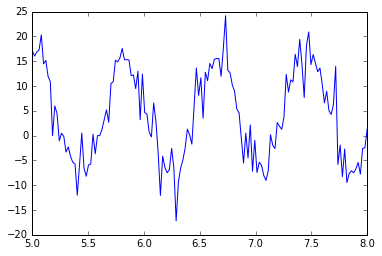

In [9]:
from pylab import *
from scipy import *

%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

# if you experience problem "optimize not found", try to uncomment the following line. The problem is present at least at Ubuntu Lucid python scipy package
# from scipy import optimize
# Generate data points with noise
num_points = 150
Tx = linspace(5., 8., num_points)
Ty = Tx
 
tX = 11.86*cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-rand(num_points))*exp(2*rand(num_points)**2))
tY = -32.14*cos(2*pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-rand(num_points))*exp(2*rand(num_points)**2))

plt.plot(Tx,tX)

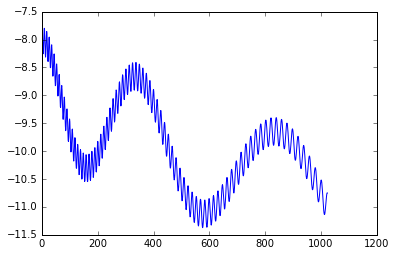

In [3]:
num_points = 1024
x = linspace(4., 8., num_points)
freq_phase = linspace(400,800,1024)
z= linspace(-9., -11, num_points)
y = z + cos(2*pi*30/x) + 0.25*cos(2*pi*1000/x)
plt.plot(y)

C:\Users\sidhant\Anaconda3\envs\py3k\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 20)

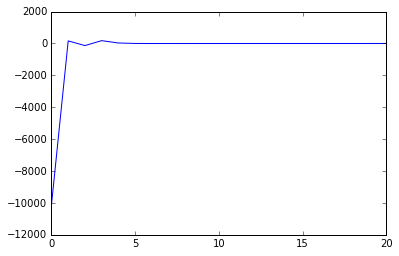

In [8]:
dd=np.fft.fft(y)
plt.plot(dd)
xlim([0,20])

C:\Users\sidhant\Anaconda3\envs\py3k\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


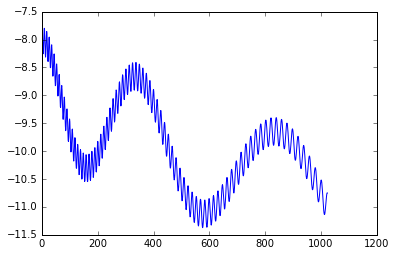

In [7]:
plt.plot(np.fft.ifft(dd))

100


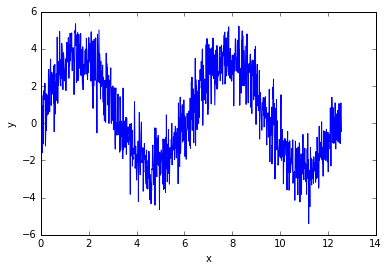

In [62]:
import matplotlib.pyplot as plt # For ploting
import numpy as np # to work with numerical data efficiently



N = 1000 # number of data points
x1 = np.linspace(0, 4*np.pi, N)
y = 3.0*np.sin(x1+0.001) + 0.5 + np.random.randn(N)

plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')

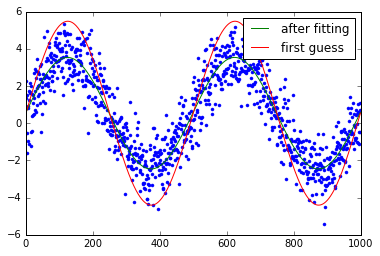

In [63]:
from scipy.optimize import leastsq
guess_mean = np.mean(y)
guess_std = 3*np.std(y)/(2**0.5)
guess_phase = 0

data_first_guess = guess_std*np.sin(x1+guess_phase) + guess_mean

optimize_func = lambda x: x[0]*np.sin(x1+x[1]) + x[2] - y
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]


data_fit = est_std*np.sin(x1+est_phase) + est_mean

plt.plot(y, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

In [77]:
def my_sin(x, freq, amplitude, phase):
    return np.sin(freq*x*num + phase) * amplitude 

1.00000000039


C:\Users\sidhant\Anaconda3\envs\py3k\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


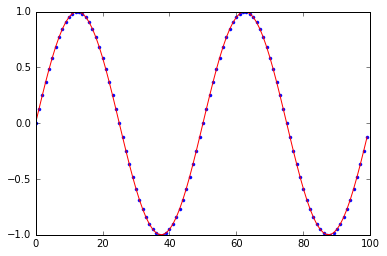

In [84]:
from scipy.optimize import curve_fit
import matplotlib.cm as cm

fs = 100 # sample rate 
f = 2 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
y = [ np.sin(2*np.pi*f * (i/fs)) for i in np.arange(fs)]

% matplotlib inline

guess_freq = 1
guess_amplitude = 1 #3*np.std(y)/(2**0.5)
guess_phase = 0 
num=2

x1 = np.linspace(0, 2*np.pi, fs)

p0=[guess_freq, guess_amplitude, guess_phase]

fit,conv = curve_fit(my_sin, x1, y, p0=p0)
data_fit = my_sin(x1, *fit)
print (fit[1])

plt.figure()
plt.plot(y, '.', label='')
plt.plot(data_fit ,'r' , label='')
plt.legend()


100
100


C:\Users\sidhant\Anaconda3\envs\py3k\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


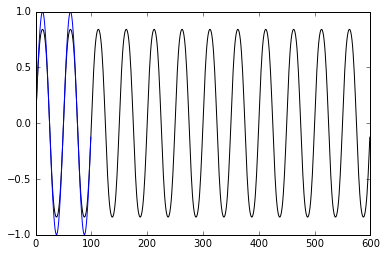

In [46]:
def gain_fit1(x,a,b): 
    return a*(np.sin(2*np.pi*b*x))#/(0.84*300)+p[2])) + p[3]*(np.cos(2*np.pi*p[4]*x/(0.84*300)+p[5])) +p[6]*x + p[7]

para, conv = curve_fit(gain_fit1, x, y)


plt.plot(gain_fit1(y,*para), 'k')
plt.plot(y)

In [ ]:
def gain_fit1(x,a,b): 
    return a*(np.sin(2*np.pi*b*x))

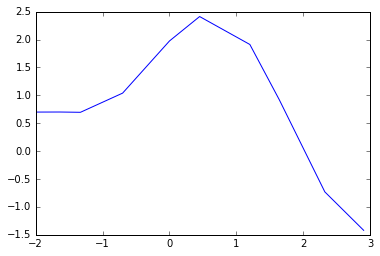

In [48]:
xdata = -2,-1.64,-1.33,-0.7,0,0.45,1.2,1.64,2.32,2.9
ydata = 0.699369,0.700462,0.695354,1.03905,1.97389,2.41143,1.91091,0.919576,-0.730975,-1.42001
plt.plot(xdata,ydata)

C:\Users\sidhant\Anaconda3\envs\py3k\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


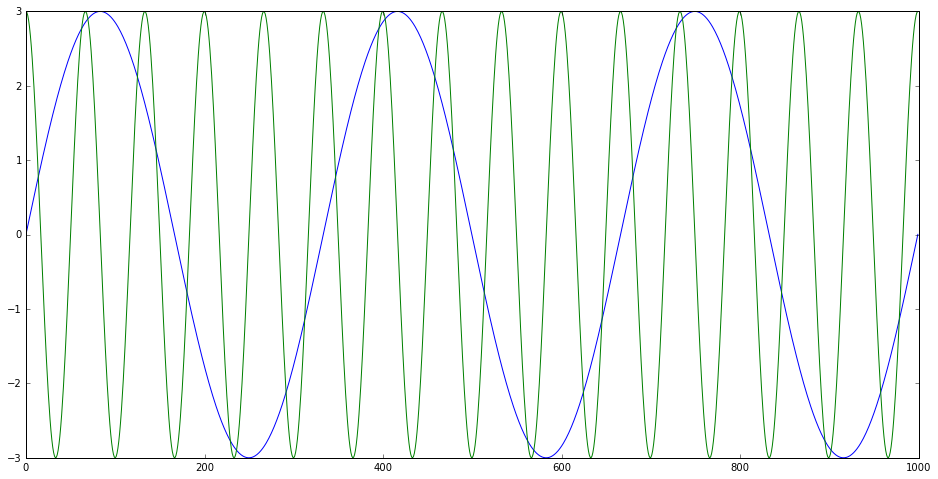

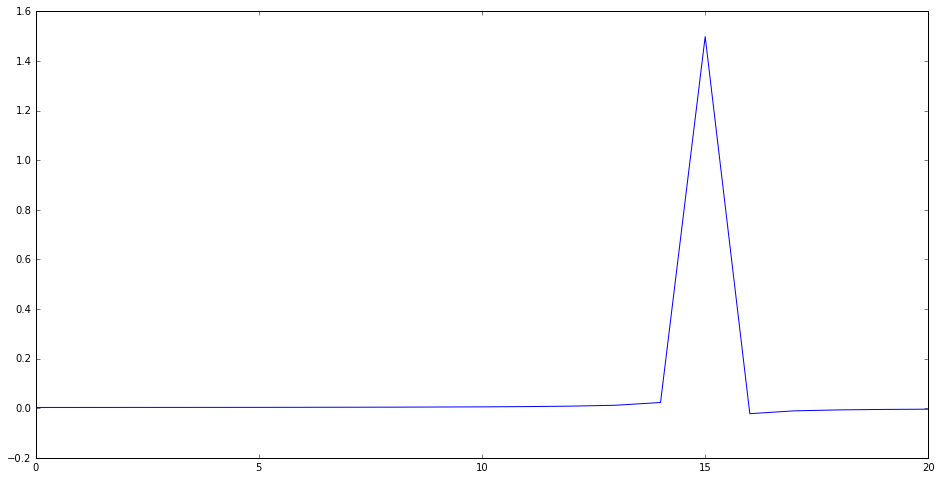

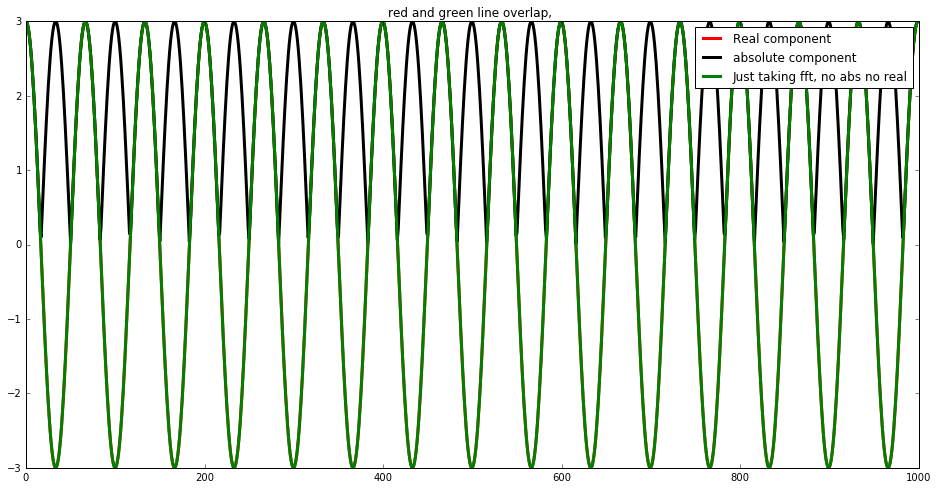

In [8]:
N = 1000 # number of data points
x1 = np.linspace(0, 6*np.pi, N)
y = 3.0*np.sin(x1+0.001) 
plt.plot(y)

x1 = np.linspace(0, 30*np.pi, N)
y = 3.0*np.cos(x1+0.001) 
plt.plot(y)

ifft_component = np.fft.ifft(y)

plt.figure()
plt.plot(ifft_component)
plt.xlim(0,20)

figure(figsize(16,8))
plt.figure()

plt.plot(np.real(np.fft.fft(ifft_component)),'r',linewidth=3, label = 'Real component',)
plt.plot(np.abs(np.fft.fft(ifft_component)),'k',linewidth=3, label = 'absolute component')
plt.plot((np.fft.fft(ifft_component)),'g',linewidth=3, label = 'Just taking fft, no abs no real')
plt.title('red and green line overlap, ')
plt.legend()

In [102]:
n=3
#aa=[1,2,3]
a = np.zeros(shape=(n,2))
for i in range(n):
    a[i,:]=1#aa
a

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [107]:
term2 = np.arange(990)
num = 2*np.pi*10
sin_curve = [np.sin(term2*i/990) for i in range(len(term2))]


In [110]:
2

KeyboardInterrupt: 

In [17]:
import random
a =random(10,10)
print(a)
plt.imshow(a, interpolation='nearest')

b = ones(a.shape+(4,)) # «white» matrix with alpha=1
for i in range(a.shape[0]):
    for j in range(i, a.shape[1]):
        b[i,j,3] = 0   # upper triangle, alpha = 0
imshow(b, interpolation='nearest')

TypeError: randint() takes 3 positional arguments but 4 were given

In [8]:
kk=[1,2,3,4,1,2,31,4,50,6,2,5,2,8,0,2,88,33,1,2,3,4,1,2,3]
mm=[]
mm=kk < np.mean(kk) 

for i in range(len(mm)):
    if mm[i] == True:
        print("true")
        kk[i] = kk[i]+1
print (len(mm))

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
25


In [10]:
elements = []

for i in range(3):
    elements.append([])

print(elements)

[[], [], []]


In [13]:
elements[1].append(3)
elements[1].append([2,3,4])

In [14]:
print(elements)

[[], [3, 3, [2, 3, 4]], []]


In [15]:
print (elements[1][:])

[3, 3, [2, 3, 4]]


In [16]:
print (elements[1][2])

[2, 3, 4]


In [17]:
a= [[]]*3

In [21]:
a[0].append(3)
a[1].append([2,3,4])

In [22]:
print(a)

[[3, [2, 3, 4], 3, [2, 3, 4]], [3, [2, 3, 4], 3, [2, 3, 4]], [3, [2, 3, 4], 3, [2, 3, 4]]]


In [23]:
x=[]
y=[1,2,3,4]
x=y
print (x)

[1, 2, 3, 4]


In [66]:
def find_nearest(array, value):
    n = [abs(i-value) for i in array]
    print(n)
    idx = n.index(min(n))
    return idx

a=[11,2,5,33,45,55,66,34,38,5]
a0=50
x = find_nearest(a,a0)
print(x)

[39, 48, 45, 17, 5, 5, 16, 16, 12, 45]
4


In [60]:
aa=np.where(a == a0)[0]
print(aa)


[]


In [47]:
import numpy as np
values = np.array([1,2,3,1,2,4,5,6,3,2,1])
searchval = 3
ii = np.where(values == searchval)[0]
print (ii)

[2 8]


In [69]:
values = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23])
searchval = 5
ii = np.where(values == searchval)[0]
print (ii)

[30 31 32 33 34 35]


In [72]:
count=0
for i in range(2048):
    count = count+i
print(count)

2096128
